In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
print(tf.__version__)

tf.keras.backend.clear_session()  # For easy reset of notebook state.

2.0.0-alpha0


In [2]:
import pandas as pd
import numpy as np
import xarray as xr

In [3]:
import os

df = {}
file_path = os.path.join(os.getcwd(), "forex-data")
for f in os.listdir(file_path):
    if f.startswith('USD'):
        df[f] = pd.read_csv(os.path.join(file_path, f))
        df[f]['openTime'] = pd.to_datetime(df[f].Date, unit='ns')
        df[f]['openTime'] = pd.DatetimeIndex(df[f]['openTime'] )
        df[f].index = df[f]['openTime']
        df[f].drop(columns=['openTime', 'Date'])
        df[f] = xr.DataArray(df[f], dims=['openTime', 'feature']) 
        
chart = xr.Dataset(df).to_array(dim='asset')
print(chart)
print(type(chart))

<xarray.DataArray (asset: 4, openTime: 74551, feature: 7)>
array([[[1.16106, '2015-01-01T22:00:00.000000000Z', ..., 33,
         Timestamp('2015-01-01 22:00:00')],
        [1.16096, '2015-01-01T22:10:00.000000000Z', ..., 160,
         Timestamp('2015-01-01 22:10:00')],
        ...,
        [1.3446200000000001, '2016-12-30T21:40:00.000000000Z', ..., 257,
         Timestamp('2016-12-30 21:40:00')],
        [1.34423, '2016-12-30T21:50:00.000000000Z', ..., 896,
         Timestamp('2016-12-30 21:50:00')]],

       [[0.99372, '2015-01-01T22:00:00.000000000Z', ..., 23,
         Timestamp('2015-01-01 22:00:00')],
        [0.99384, '2015-01-01T22:10:00.000000000Z', ..., 25,
         Timestamp('2015-01-01 22:10:00')],
        ...,
        [1.01876, '2016-12-30T21:40:00.000000000Z', ..., 131,
         Timestamp('2016-12-30 21:40:00')],
        [1.01893, '2016-12-30T21:50:00.000000000Z', ..., 525,
         Timestamp('2016-12-30 21:50:00')]],

       [[6.15319, '2015-01-01T22:00:00.000000000Z', ...

[9.87500000e-01 9.87180859e-01 9.87040512e-01 ... 3.56243508e-04
 3.56303806e-04 3.56262507e-04]


<IPython.core.display.Javascript object>


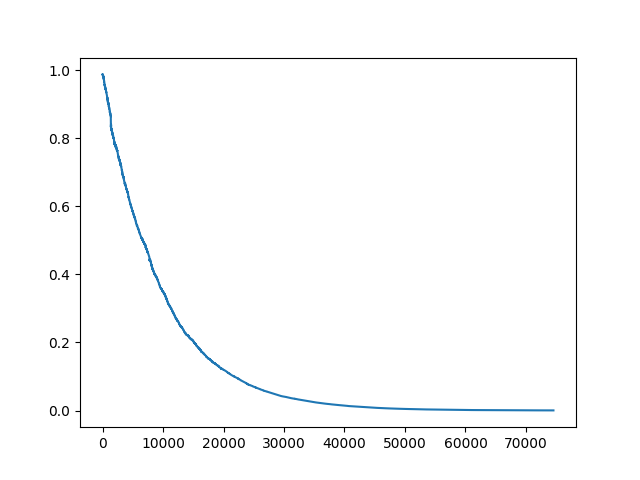

In [27]:
close_price = chart.sel(feature='Close')
close_price = close_price.T
usd_data = np.ones((close_price.shape[0],1))
in_data = np.hstack((usd_data, close_price))
in_data = in_data[1:] / in_data[:-1]
in_data = in_data / in_data[0]

# print(in_data)
# print(in_data.shape)

from mercurius.strategy.ucrp import ucrp
import logging

logging.basicConfig(level=logging.INFO)

uc = ucrp()
uc.trade(in_data, tc=0.025)
result = uc.finish(True, True)

print(result['portfolio'])

import matplotlib.pyplot as plt
%matplotlib notebook


plt.plot(result['portfolio'])
plt.show()

